In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

sys.path.insert(0, '/home/aew492/CFE_gradients/code')
import load_tools

In [3]:
"""given volume, number density, and representative power spectrum value,
    return the expected precision of the CF estimation: equation from Weinberg OSU"""
def std_grad(V, n, P):
    std = P * (V**(-.5) * (1 + (n*P)**(-1))) * (V**(-1/3))  # last factor is from position dependence across box
    return std

In [4]:
# find corresponding k, and P_G(k), for some input separation r
def get_PkG(r, PkG_fn='/scratch/ksf293/mocks/lognormal/inputs/cat_L750_n2e-4_z057_patchy_As2x_pkG.dat'):
    kG, PkG = np.loadtxt(PkG_fn).T
    
    k = min(kG, key=lambda x:abs(x-1/r))  # closest k value to 1/r
    P = PkG[np.where(kG==k)][0]
    return k, P

In [5]:
# from the expected_precision notebook, we've decided to use PkG at r=40 as our representative value:
k_rep, P_rep = get_PkG(40)
k_rep, P_rep

(0.02511886432, 76730.64364)

#### precision scalings with boxsize*
\* m values adjusted so that these all have equal "physical" spatial gradients

In [6]:
sets = np.array([[500, 0.333],
        [750, 0.5],
        [1000, 0.667],
        [1500, 1]])

n = '1e-4'
b = 0.5
nmocks = 142

In [7]:
amp_arr = np.empty((len(sets), nmocks, 4))

for i, (L, m) in enumerate(sets):
    amp_arr[i] = load_tools.load_suave_amps(L=L, n=n, grad_dim=2, m=m, b=b, nmocks=nmocks)

In [8]:
# compress the amplitudes along the realizations to get the spread for each amplitude for each boxsize
amp_stds_L = np.std(amp_arr, axis=1)  # (4,4) array

In [9]:
Ls = sets[:,0]
Ls_cont = np.linspace(min(Ls), max(Ls), 100)
expected_scalings = std_grad(Ls_cont**3, float(n), P_rep)

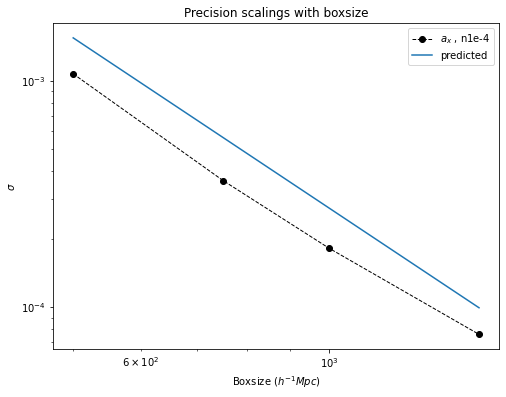

In [14]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(Ls, amp_stds_L[:,1], marker='o', ls='--', lw=1, color='k', label='$a_x$ , n1e-4')
ax.plot(Ls_cont, expected_scalings*10**-1, label='predicted')

ax.set_xlabel('Boxsize ($h^{-1}Mpc$)')
ax.set_ylabel('$\sigma$')
ax.set_title('Precision scalings with boxsize')

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()